In [1]:
# Data Exploration and Preprocessing Notebook

In [2]:
# Imports
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [3]:
# Load & Preprocess dataset
def load_images(path, classes):
    X = []
    Y = []
    for cls in classes:
        pth = os.path.join(path, cls)
        class_idx = classes[cls]
        loaded_images = 0  
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (250, 250))
            X.append(img)
            Y.append(class_idx)
            loaded_images += 1 
        #print nb of loaded images from folders
        print(f"Loaded {loaded_images} images from {cls} folder")
    return np.array(X), np.array(Y)


#Class Labels
classes = {'no_tumor': 0, 'category1_tumor': 1, 'category2_tumor': 2, 'category3_tumor': 3}

X, Y = load_images('Datathon-Dataset', classes)

Loaded 490 images from no_tumor folder
Loaded 916 images from category1_tumor folder
Loaded 927 images from category2_tumor folder
Loaded 891 images from category3_tumor folder


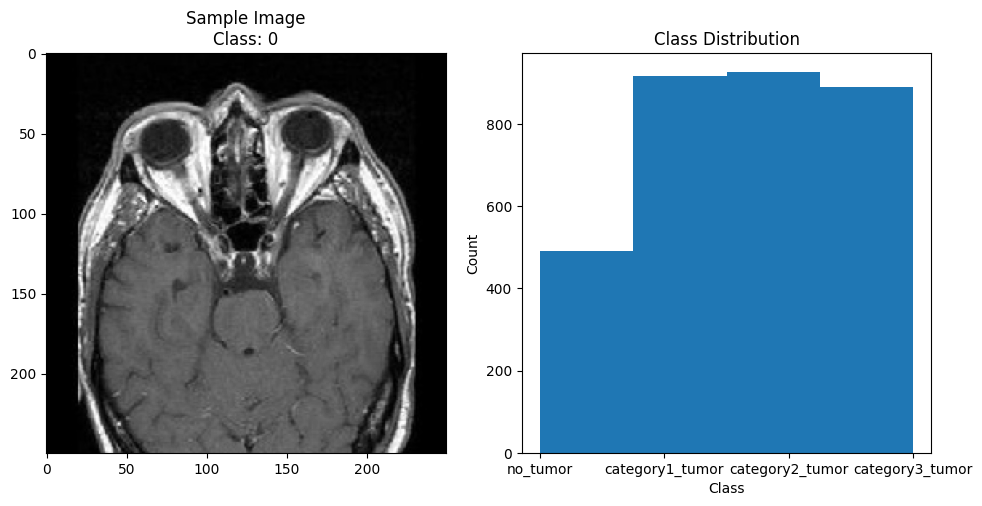

In [4]:
# Data exploration
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0], cmap='gray')
plt.title(f"Sample Image\nClass: {Y[0]}")

plt.subplot(1, 2, 2)
plt.hist(Y, bins=len(classes))
plt.xticks(list(classes.values()), list(classes.keys()))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [5]:
# Data preprocess and save
X = X.reshape(X.shape[0], 250, 250, 1)
X = X / 255.0

np.save('preprocessed_data.npy', X)
np.save('preprocessed_labels.npy', Y)
print("Preprocessed data saved successfully.")

Preprocessed data saved successfully.
